# Logistic Regression Model Comparisons - Lab

## Introduction

In this lab, you'll investigate using scikit-learn with regularization in order to produce better models.

## Objectives

- Compare the different inputs with logistic regression models and determine the optimal model 

In [1]:
# Import the necessary packages
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt



## Import the data

Import the dataset stored in `'heart.csv'`.

In [2]:
# Import the data

df = pd.read_csv('heart.csv')

# Print the first five rows of the data
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333,1.0
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667,1.0
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667,1.0
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667,1.0
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667,1.0


## Split the data

Define `X` and `y` where the latter is the `target` variable. This time, follow best practices and also implement a standard train-test split. Assign 25% to the test set and set the `random_state` to 17. 

In [3]:
# Define X and y
y = df['target']
X = df.drop('target', axis=1)

# Split the data into training and test sets


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=17)
print(y_train.value_counts(),'\n\n', y_test.value_counts())

1.0    130
0.0     97
Name: target, dtype: int64 

 0.0    41
1.0    35
Name: target, dtype: int64


## Initial Model - scikit-learn

Use scikit-learn to build the logistic regression model.

Turn off the intercept and set the regularization parameter, `C`, to a ridiculously large number such as 1e16. 

In [4]:
# Your code here
model = LogisticRegression(fit_intercept=False, C=1e16, random_state=17)
model.fit(X_train, y_train)
print("Coefficients:", model.coef_)


Coefficients: [[ 0.77787335 -2.17909975  2.60300539 -2.64296704 -2.41086257  0.02613751
   1.35654885  6.73473013 -1.10147562 -3.92263149  0.71349717 -3.38840957
  -1.78114674]]


## Create an ROC Curve for the scikit-learn model

Use both the training and test sets.

Train AUC: 0.9291038858049168
Test AUC: 0.8996515679442508


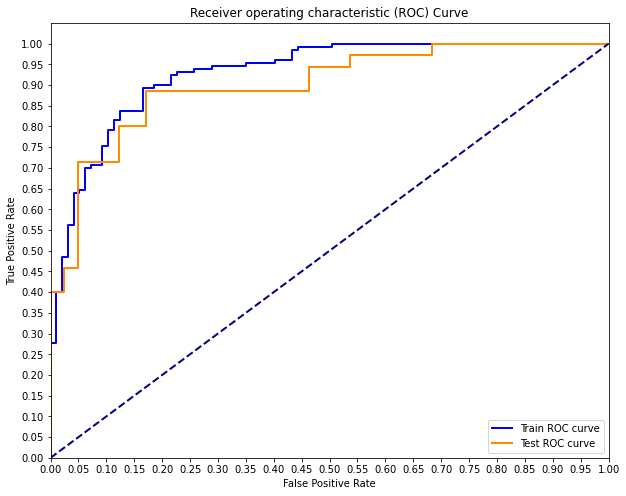

In [5]:
# Your code here

y_train_score = model.predict_proba(X_train)[:, 1]
y_test_score = model.predict_proba(X_test)[:, 1]

train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)

print('Train AUC: {}'.format(auc(train_fpr, train_tpr)))
print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))

plt.figure(figsize=(10, 8))
lw = 2

plt.plot(train_fpr, train_tpr, color='blue',
         lw=lw, label='Train ROC curve')
plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Test ROC curve')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Add an Intercept

Now add an intercept to the scikit-learn model. Keep the regularization parameter `C` set to a very large number such as 1e16. 

In [6]:
# Create new model
logregi = LogisticRegression(fit_intercept=True, C=1e16, random_state=17)
logregi.fit(X_train, y_train)
print("Intercept:", logregi.intercept_)
print("Coefficients:", logregi.coef_)

Intercept: [3.08375163]
Coefficients: [[-5.37617039e-01 -2.38937833e+00  2.45594876e+00 -2.69561280e+00
  -3.01798248e+00  2.69819202e-03  1.05518532e+00  5.14618183e+00
  -1.29756305e+00 -4.75361820e+00  3.09927500e-01 -3.33742792e+00
  -2.30074684e+00]]


Generate predictions for the training and test sets.

In [10]:
# Generate predictions
y_hat_train = logregi.predict(X_train)
y_hat_test = logregi.predict(X_test)


Plot all three models ROC curves on the same graph.

Custom Model Test AUC: 0.8331010452961672
Custome Model Train AUC: 0.8429817605075336
Scikit-learn Model 1 Test AUC: 0.8989547038327527
Scikit-learn Model 1 Train AUC: 0.9325931800158604
Scikit-learn Model 2 with intercept Test AUC: 0.8989547038327527
Scikit-learn Model 2 with intercept Train AUC: 0.9325931800158604


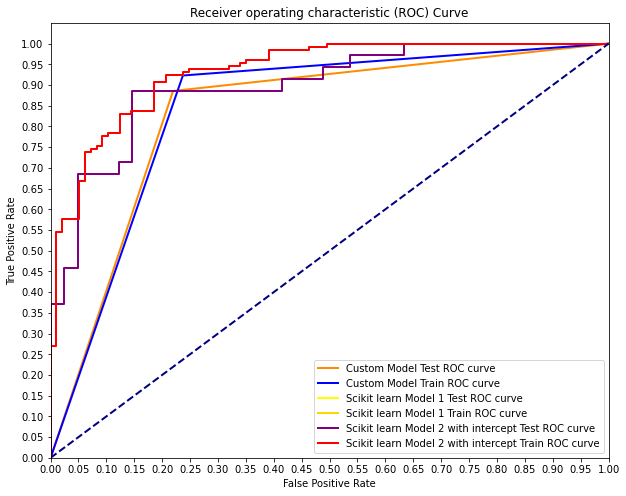

In [12]:
# Initial model plots
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_hat_test)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_hat_train)


print('Custom Model Test AUC: {}'.format(auc(test_fpr, test_tpr)))
print('Custome Model Train AUC: {}'.format(auc(train_fpr, train_tpr)))

plt.figure(figsize=(10,8))
lw = 2

plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Custom Model Test ROC curve')
plt.plot(train_fpr, train_tpr, color='blue',
         lw=lw, label='Custom Model Train ROC curve')


# Second model plots
y_test_score = logregi.decision_function(X_test)
y_train_score = logregi.decision_function(X_train)

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score)

print('Scikit-learn Model 1 Test AUC: {}'.format(auc(test_fpr, test_tpr)))
print('Scikit-learn Model 1 Train AUC: {}'.format(auc(train_fpr, train_tpr)))


plt.plot(test_fpr, test_tpr, color='yellow',
         lw=lw, label='Scikit learn Model 1 Test ROC curve')
plt.plot(train_fpr, train_tpr, color='gold',
         lw=lw, label='Scikit learn Model 1 Train ROC curve')


# Third model plots
y_test_score = logregi.decision_function(X_test)
y_train_score = logregi.decision_function(X_train)

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score)

print('Scikit-learn Model 2 with intercept Test AUC: {}'.format(auc(test_fpr, test_tpr)))
print('Scikit-learn Model 2 with intercept Train AUC: {}'.format(auc(train_fpr, train_tpr)))


plt.plot(test_fpr, test_tpr, color='purple',
         lw=lw, label='Scikit learn Model 2 with intercept Test ROC curve')
plt.plot(train_fpr, train_tpr, color='red',
         lw=lw, label='Scikit learn Model 2 with intercept Train ROC curve')

# Formatting
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Altering the Regularization Parameter

Now, experiment with altering the regularization parameter. At a minimum, create 5 different subplots with varying regularization (`C`) parameters. For each, plot the ROC curve of the training and test set for that specific model.  

Regularization parameters between 1 and 20 are recommended. Observe the difference in test and training AUC as you go along.

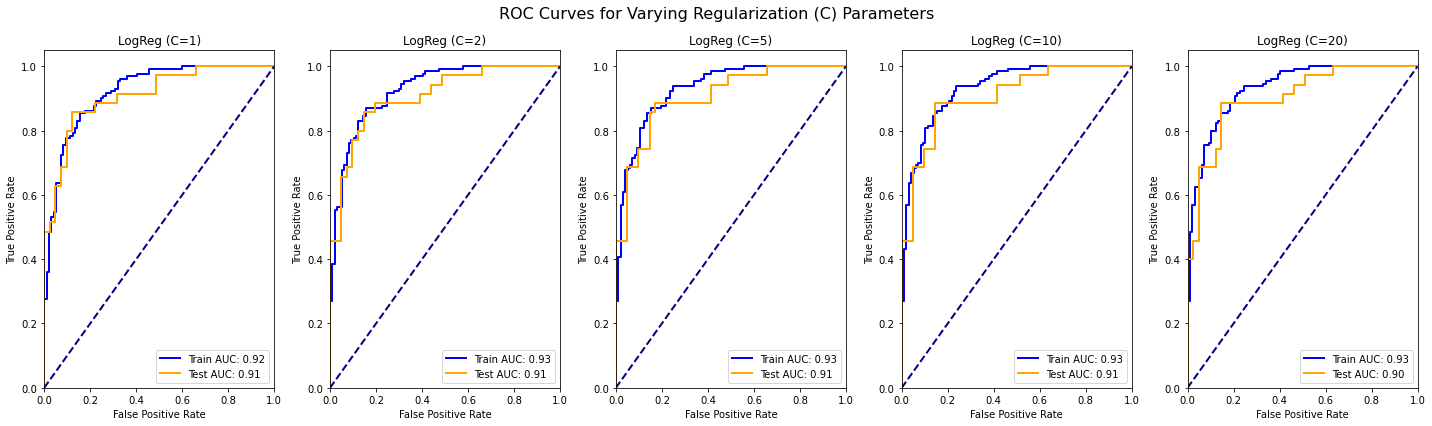

In [13]:
# Your code here
C_values = [1, 2, 5, 10, 20]

# Create a figure for the subplots
fig, axes = plt.subplots(1, 5, figsize=(20, 6))

# Loop over each value of C and train the model
for i, C in enumerate(C_values):
    # Create the model with the current value of C
    logreg = LogisticRegression(C=C, solver='liblinear', random_state=17)

    # Train the model
    logreg.fit(X_train, y_train)
    
    # Generate predictions for train and test sets
    y_hat_train = logreg.predict(X_train)
    y_hat_test = logreg.predict(X_test)

    # Calculate decision function for ROC curve plotting
    y_train_score = logreg.decision_function(X_train)
    y_test_score = logreg.decision_function(X_test)
    
    # Calculate ROC curve for train and test sets
    train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score)
    test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)
    
    # Calculate AUC for train and test sets
    train_auc = auc(train_fpr, train_tpr)
    test_auc = auc(test_fpr, test_tpr)
    
    # Plot ROC curves on the corresponding subplot
    axes[i].plot(train_fpr, train_tpr, color='blue', lw=2, label=f'Train AUC: {train_auc:.2f}')
    axes[i].plot(test_fpr, test_tpr, color='orange', lw=2, label=f'Test AUC: {test_auc:.2f}')
    axes[i].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
    axes[i].set_xlim([0.0, 1.0])
    axes[i].set_ylim([0.0, 1.05])
    axes[i].set_xlabel('False Positive Rate')
    axes[i].set_ylabel('True Positive Rate')
    axes[i].set_title(f'LogReg (C={C})')
    axes[i].legend(loc='lower right')

# Set the overall title for the plot
fig.suptitle('ROC Curves for Varying Regularization (C) Parameters', fontsize=16)
plt.tight_layout()
plt.show()

How did the regularization parameter impact the ROC curves plotted above? 

## Summary

In this lab, you reviewed many of the accuracy measures for classification algorithms and observed the impact of additional tuning models using intercepts and regularization.